In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("mnist.csv")
data = np.array(data)
np.random.shuffle(data)
n , m = data.shape
data_test = data[0:1000].T
data_train = data[0:m].T
y_test = data_test[0]
X_test = data_test[1:1000]
X_test = X_test / 255

y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

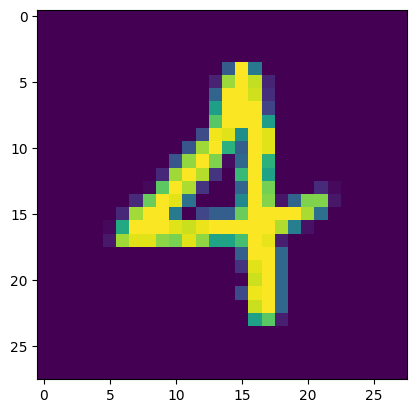

In [16]:
# 1.4.1
plt.imshow(X_train[:,0].reshape(28,28))

In [ ]:
def initialisation():
    w1 = np.random.rand(10 , 784) - 0.5
    b1 = np.random.rand(10 , 1) - 0.5
    w2 = np.random.rand(10 , 10) - 0.5
    b2 = np.random.rand(10 , 1) - 0.5
    return w1 , b1 , w2 , b2

def relu(z) :
    return max(z , 0)

def softmax(z) :
    a = np.exp(z) / (np.sum(np.exp(z)))
    return a

def prop_avant(w1 , b1 , w2 , b2 , X) :
    z1 = w1.dot(X) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1 , a1 , z2 , a2

In [ ]:
def derive_relu (Z) :
    return (Z > 0)

def retro (z1 , a1 , z2 , a2 , w1 , w2 , X , y) :
    dz2 = a2 - y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T * dot(dz2) * derive_relu(dz1)
    dw1 = 1 / m * dz1.dot(X.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1 , db1 , dw2 , db2